In [1]:
from factor_transducer import *
import sentencepiece as spm
import k2

In [12]:
sp_model_path = "/exp/rhuang/meta/audio/examples/asr/librispeech_conformer_ctc/spm_unigram_1023.model"
sp = spm.SentencePieceProcessor(model_file=str(sp_model_path))

token2id = {sp.id_to_piece(i): i for i in range(sp.vocab_size())}
id2token = {v: k for k, v in token2id.items()}

del token2id[id2token[0]]
token2id["<eps>"] = 0
id2token[0] = "<eps>"

In [3]:
text = "pen apple"
text_encoded = sp.encode(text, out_type=int)

# text_encoded = [24, 102, 70]
# text_encoded = [49, 11, 7, 161, 24]
# text_encoded = [49, 11, 7, 49, 49, 161, 24]

print(text_encoded)
print([sp.id_to_piece(p) for p in text_encoded])

[340, 15, 7, 208, 44]
['▁pe', 'n', '▁a', 'pp', 'le']


In [19]:
fst = make_factor_transducer5(text_encoded, return_str=False, blank_penalty=0)

fst.labels_sym = k2.SymbolTable.from_str("\n".join([f"{k} {v}" for k, v in token2id.items()]))
fst.aux_labels_sym = fst.labels_sym

TypeError: make_factor_transducer5() got an unexpected keyword argument 'return_str'

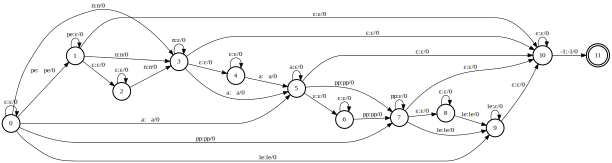

In [18]:
k2.to_dot(fst)